## Código de Exemplificação do Algoritimo de Grover

Número ideal de iterações: 4


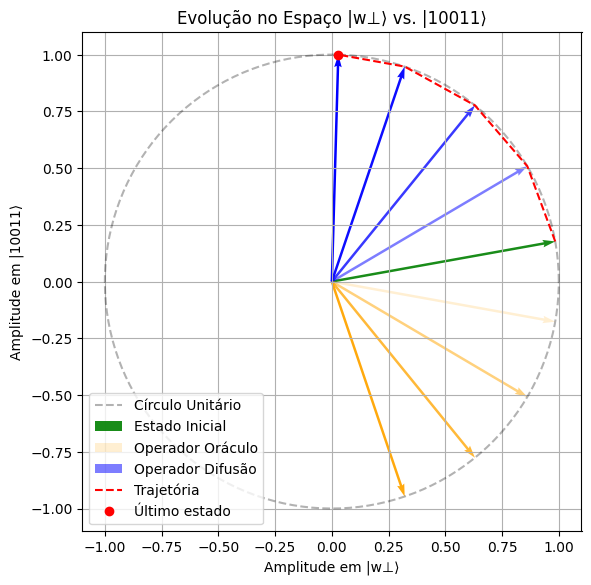

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
n = 5  # Sugestão: Você pode trocar para no máx 20, mas cuidado com o uso de memória!
N = 2**n
w = np.random.randint(0, N)

# Estado |0⟩
zero_state = np.zeros((N, 1))
zero_state[0][0] = 1

# Hadamard
def hadamard_n(n):
    H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    H_n = H
    for _ in range(n - 1):
        H_n = np.kron(H_n, H)
    return H_n

H = hadamard_n(n)
s = H @ zero_state  # Estado inicial uniforme

# Estado marcado |w⟩
w_vec = np.zeros((N, 1))
w_vec[w][0] = 1

# Componente ortogonal a |w⟩
proj = (w_vec.T @ s)[0, 0]
w_perp = s - proj * w_vec
norm = np.linalg.norm(w_perp)
if norm != 0:
    w_perp /= norm

# Operadores
def oracle(N, w):
    O = np.identity(N)
    O[w][w] = -1
    return O

def diffusion_operator(N):
    s_vector = np.ones((N, 1)) / np.sqrt(N)
    return 2 * s_vector @ s_vector.T - np.identity(N)

O = oracle(N, w)
D = diffusion_operator(N)

# Número de iterações
R = int(np.floor(np.pi / 4 * np.sqrt(N)))
print(f"Número ideal de iterações: {R}")

# Início do gráfico
fig, ax = plt.subplots(figsize=(6, 6))

theta = np.linspace(0, 2*np.pi, 300)
ax.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, label='Círculo Unitário')

# Estado inicial
state = s.copy()
a1_init = (w_perp.T @ state)[0, 0]
aw_init = (w_vec.T @ state)[0, 0]
ax.quiver(0, 0, np.real(a1_init), np.real(aw_init), angles='xy', scale_units='xy', scale=1,
          width=0.005, color='green', label='Estado Inicial', alpha=0.9)
amp_points = [(np.real(a1_init), np.real(aw_init))]

# Iterações de Grover
for i in range(R):
    # Etapa 1: Oráculo
    state_orac = O @ state
    a1_orac = (w_perp.T @ state_orac)[0, 0]
    aw_orac = (w_vec.T @ state_orac)[0, 0]
    ax.quiver(0, 0, np.real(a1_orac), np.real(aw_orac), angles='xy', scale_units='xy', scale=1,
              width=0.005, color='orange', label='Operador Oráculo' if i == 0 else "", alpha=abs(aw_orac))

    # Etapa 2: Difusão
    state = D @ state_orac
    a1 = abs((w_perp.T @ state))[0, 0]
    aw = abs((w_vec.T @ state))[0, 0]
    amp_points.append((np.real(a1), np.real(aw)))
    ax.quiver(0, 0, np.real(a1), np.real(aw), angles='xy', scale_units='xy', scale=1,
              width=0.005, color='blue', label='Operador Difusão' if i == 0 else "", alpha=abs(aw))

# Trajetória
x_vals, y_vals = zip(*amp_points)
ax.plot(x_vals, y_vals, 'r--', label='Trajetória')

# Último ponto
ax.plot(x_vals[-1], y_vals[-1], 'ro', label='Último estado')

# Layout
ax.set_title(f"Evolução no Espaço |w⊥⟩ vs. |{w:0{n}b}⟩")
ax.set_xlabel("Amplitude em |w⊥⟩")
ax.set_ylabel(f"Amplitude em |{w:0{n}b}⟩")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()
